In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
challenger_path = "Data/Challenger.csv"

challenger = pd.read_csv(challenger_path, sep=";")
challenger.head()

,flt,temp,td
0,1,66,0
1,2,70,1
2,3,69,0
3,4,68,0
4,5,67,0


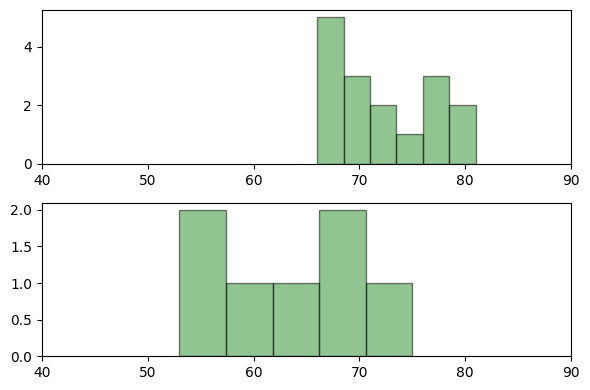

In [37]:
fig, ax = plt.subplots(2, 1 , figsize=(6, 4))

ax[0].hist(challenger["temp"][challenger['td'] == 0], bins=6, color="forestgreen", alpha=0.5, edgecolor="black")

ax[1].hist(challenger["temp"][challenger['td'] == 1], bins=5, color="forestgreen", alpha=0.5, edgecolor="black")

for i in range(2):
    ax[i].set_xlim(40, 90)

plt.tight_layout()
plt.show()

In [38]:
from scipy.stats import ttest_ind

print(ttest_ind(challenger["temp"][challenger['td'] == 0], challenger["temp"][challenger['td'] == 1]))
print(ttest_ind(challenger["temp"][challenger['td'] == 0], challenger["temp"][challenger['td'] == 1], equal_var=False))

TtestResult(statistic=3.1032447231205595, pvalue=0.005382629028436768, df=21.0)
TtestResult(statistic=2.538716539348291, pvalue=0.035068338112732994, df=7.9166218696818165)


[[-0.22950051]] [14.86192709]


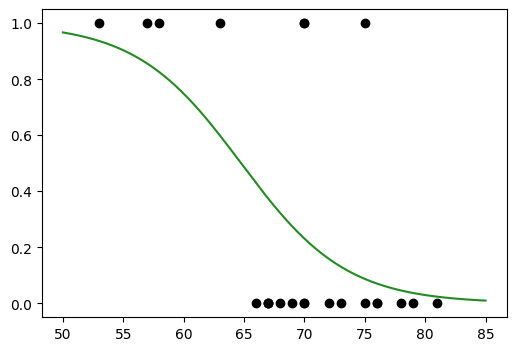

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(challenger["temp"].values.reshape(-1, 1), challenger["td"])

print(model.coef_, model.intercept_)

# plot the logistic regression model

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

x = np.linspace(50, 85, 1000)

y = 1 / (1 + np.exp(-(model.coef_[0][0] * x + model.intercept_[0])))

ax.plot(x, y, color="forestgreen")

ax.scatter(challenger["temp"], challenger["td"], color="black")

plt.show()

In [40]:
organ_path = "Data/Organ.csv"

organ = pd.read_csv(organ_path, sep=";")
organ.head()

,weight,organ
0,16,"1,6"
1,"17,5","0,7"
2,"18,5",1
3,"18,5","1,4"
4,19,"1,7"


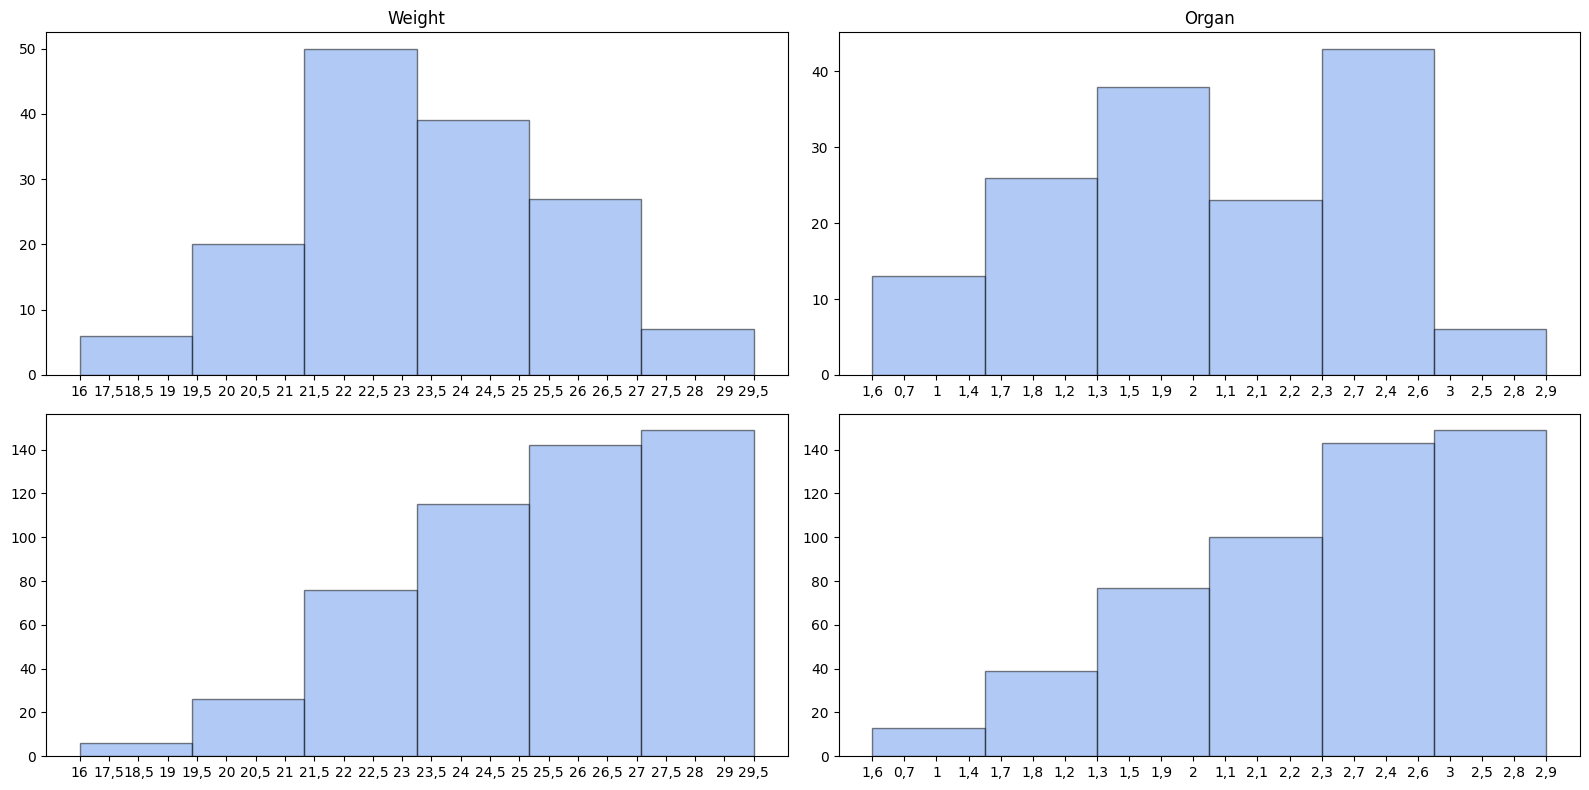

In [64]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))

ax[0, 0].hist(organ["weight"], bins=6, color="cornflowerblue", alpha=0.5, edgecolor="black")
ax[0, 0].set_title("Weight")

ax[1, 0].hist(organ["weight"], bins=6, color="cornflowerblue", alpha=0.5, edgecolor="black", cumulative=True)

ax[0, 1].hist(organ["organ"], bins=6, color="cornflowerblue", alpha=0.5, edgecolor="black")
ax[0, 1].set_title("Organ")

ax[1, 1].hist(organ["organ"], bins=6, color="cornflowerblue", alpha=0.5, edgecolor="black", cumulative=True)

plt.tight_layout()
plt.show()

In [89]:
# goodness of fit test
from scipy.stats import norm, shapiro, kstest, anderson, cramervonmises

tests = [shapiro, kstest, anderson, cramervonmises]

mu, sigma = norm.fit(x)

def floatify(x):
    return list(x.str.replace(",", ".").astype(float))

sample = floatify(organ["organ"])

print("Shapiro-Wilk: ", shapiro(sample))
print("Kolmogorov-Smirnov: ", kstest(sample, "norm", args=(mu, sigma)))
print("Anderson-Darling: ", anderson(sample, "norm"))
print("Cramer-von Mises: ", cramervonmises(sample, "norm", args=(mu, sigma)))

Shapiro-Wilk:  ShapiroResult(statistic=0.984665036201477, pvalue=0.09692948311567307)
Kolmogorov-Smirnov:  KstestResult(statistic=0.9999999999099777, pvalue=0.0, statistic_location=3.0, statistic_sign=1)
Anderson-Darling:  AndersonResult(statistic=0.8681366550488292, critical_values=array([0.562, 0.64 , 0.767, 0.895, 1.065]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=2.0214765100671146, scale=0.4177746318597815)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Cramer-von Mises:  CramerVonMisesResult(statistic=49.66666665822156, pvalue=9.303618764278099e-09)


In [109]:
print("Coveriance matrix: ")
print(np.cov([floatify(organ["weight"]), floatify(organ["organ"])]))
print()
print("Pearson correlation: ") 
print(np.corrcoef([floatify(organ["weight"]), floatify(organ["organ"])]))
print()
print("Correlation matrix: ")
print(np.corrcoef([floatify(organ["weight"]), floatify(organ["organ"])]))

Coveriance matrix: 
[[5.6348177  0.64423862]
 [0.64423862 0.17453564]]

Pearson correlation: 
[[1.         0.64962803]
 [0.64962803 1.        ]]

Correlation matrix: 
[[1.         0.64962803]
 [0.64962803 1.        ]]


In [111]:
# eigenvalues and eigenvectors

eigenvalues, eigenvectors = np.linalg.eig(np.cov([floatify(organ["weight"]), floatify(organ["organ"])]))

print("Eigenvalues: ", eigenvalues)
print("Eigenvectors: ", eigenvectors)

Eigenvalues:  [5.70979939 0.09955396]
Eigenvectors:  [[ 0.99329495 -0.11560767]
 [ 0.11560767  0.99329495]]


In [106]:
X = [[1, 0, 2], [3, 4, 5], [1, 5, 9]]

print(np.mean(X, axis=1))
print(np.cov(X))
print(np.corrcoef(X))

[1. 4. 5.]
[[ 1.   0.5  2. ]
 [ 0.5  1.   4. ]
 [ 2.   4.  16. ]]
[[1.  0.5 0.5]
 [0.5 1.  1. ]
 [0.5 1.  1. ]]


In [ ]:
rho = -0.499

X = np.array([[1, rho, rho], [rho, 1, rho], [rho, rho, 1]])

# eigenvalues must be non-negative
# -0.5 < rho < 1.0

print(np.linalg.eig(X))

(array([1.499, 0.002, 1.499]), array([[ 0.81649658, -0.57735027,  0.14978319],
       [-0.40824829, -0.57735027, -0.7699986 ],
       [-0.40824829, -0.57735027,  0.62021541]]))
